If we have the following expression:
$$ A(x_1, x_2) = B(x_1, x_2) C(x_1, x_2) $$
Then the fourier-transformed version will have some unknown function $f$:
$$ \hat{A}(\xi_1, \xi_2) = f \left[ \hat{B}(\xi_1, \xi_2), \hat{C}(\xi_1, \xi_2) \right] $$

If $\hat{B}(\xi_1, \xi_2)$ and $\hat{C}(\xi_1, \xi_2)$ are known functions, is there another way to obtain $\hat{A}(\xi_1, \xi_2)$ than:
$$ \hat{A}(\xi_1, \xi_2) = \mathcal{F} \left[\mathcal{F}^{-1} (\hat{B}(\xi_1, \xi_2)) \odot \mathcal{F}^{-1} (\hat{C}(\xi_1, \xi_2)) \right] $$
note that $\odot$ symbolizes the Hadamard Product (element-wise multiplication)

More specifically, say we needed to do this numerically, for the arrays $A_{ij} = B_{ij} C_{ij} $. Is there a better way to obtain:

$$ \hat{A}_{pq} = \text{fft2} \left[ \text{ifft2} (\hat{B}_{pq}) \odot \text{ifft2} (\hat{C}_{pq}) \right] $$

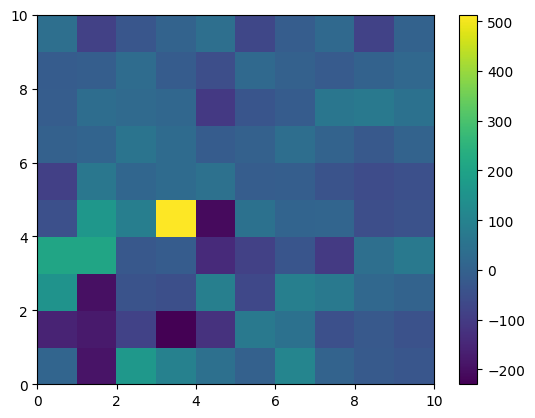

In [45]:
import numpy as np
import scipy as sc

b = np.random.rand(10, 10)
c = np.random.rand(10, 10)

B = np.fft.fft2(b)
C = np.fft.fft2(c)

A1 = np.real(np.fft.fft2((np.fft.ifft2(B) * np.fft.ifft2(C))))
A2 = np.real(sc.signal.convolve2d(B, C, mode = 'same', boundary = 'fill'))[0:10, 0:10]

import matplotlib.pyplot as plt
plt.pcolor(A2 - A1)
plt.colorbar()
plt.show()

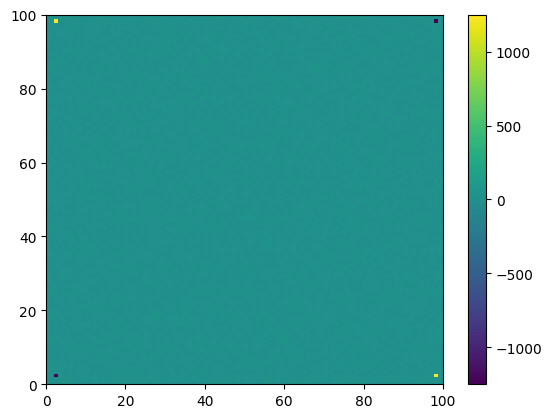

In [57]:
import numpy as np
from numpy import pi
import scipy as sc

M, N = 100, 100

x_dom, y_dom, t_dom = [0, 2 * pi], [0, 2 * pi], [0, 100]
x = np.linspace(x_dom[0], x_dom[1], M, endpoint = False)
y = np.linspace(y_dom[0], y_dom[1], N, endpoint = False)

u = np.empty(shape = (M, N))
omega_x = np.empty(shape = (M, N))

for i in range(0, M):
    for j in range(0, N):
        u[i, j] = np.cos(x[i]) * np.sin(y[j])
        omega_x[i, j] = 2 * np.sin(x[i]) * np.cos(y[j]) 

U = np.fft.fft2(u)
Omega_x = np.fft.fft2(omega_x)

a = np.empty(shape = (M, N))
for i in range(0, M):
    for j in range(0, N):
        a[i, j] = 2 * np.cos(x[i]) * np.sin(x[i]) * np.cos(y[j]) * np.sin(y[j])

A = np.real(np.fft.fft2(a))
A1 = np.real(np.fft.fft2(np.fft.ifft2(U) * np.fft.ifft2(Omega_x)))
A2 = np.real(sc.signal.convolve2d(U, Omega_x, mode = 'same', boundary = 'fill'))[0:M, 0:N]

import matplotlib.pyplot as plt
plt.pcolor(A - A2)
plt.colorbar()
plt.show()